In [1]:
import pandas as pd
import numpy as np

#Text processing libraries
import re
import nltk
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer

#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

lemmatizer = WordNetLemmatizer() 

pd.pandas.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHARISHMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CHARISHMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Load training data
df_data=pd.read_csv('twitter_training.csv',header=None)
df_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_data.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
#shape of data
print('Train data shape: ',df_data.shape)

Train data shape:  (74682, 4)


In [8]:
#percentage of missing data
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.918561
dtype: float64

In [9]:
#As only 0.91% of data in Tweet features are null we will drop them
df_data.dropna(axis=0,inplace=True)

In [10]:
#As only 0.91% of data in Tweet features are null we will drop them
df_data.dropna(axis=0,inplace=True)

#check percentage of missing data after dropping missing features
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.0
Topic        0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
print('Distinct Values: \n')
col=['Topic','Sentiment']
for i in col:
    print(i,'->')
    print(df_data[i].value_counts())
    print('\n')

Distinct Values: 

Topic ->
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Border

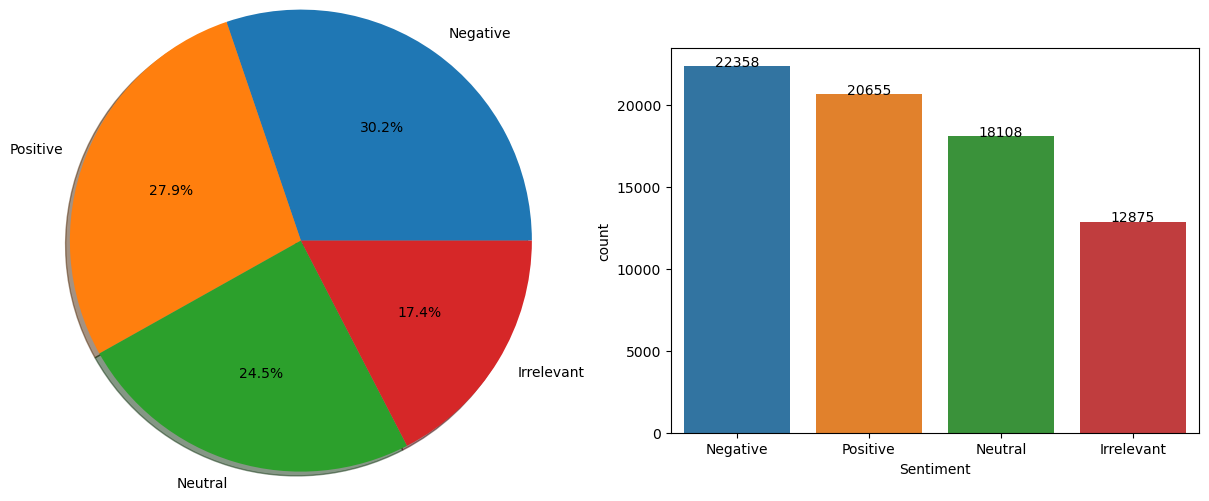

In [13]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data['Sentiment'].value_counts().index
label_count = df_data['Sentiment'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [14]:
#Get the count of words in each tweet
df_data['Tweet_word_count']=df_data['Tweet'].apply(lambda x: len(x.split()))

C:\Users\CHARISHMA\AppData\Local\Temp\ipykernel_3552\3068887087.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_data['Tweet_word_count'])


<Axes: xlabel='Tweet_word_count', ylabel='Density'>

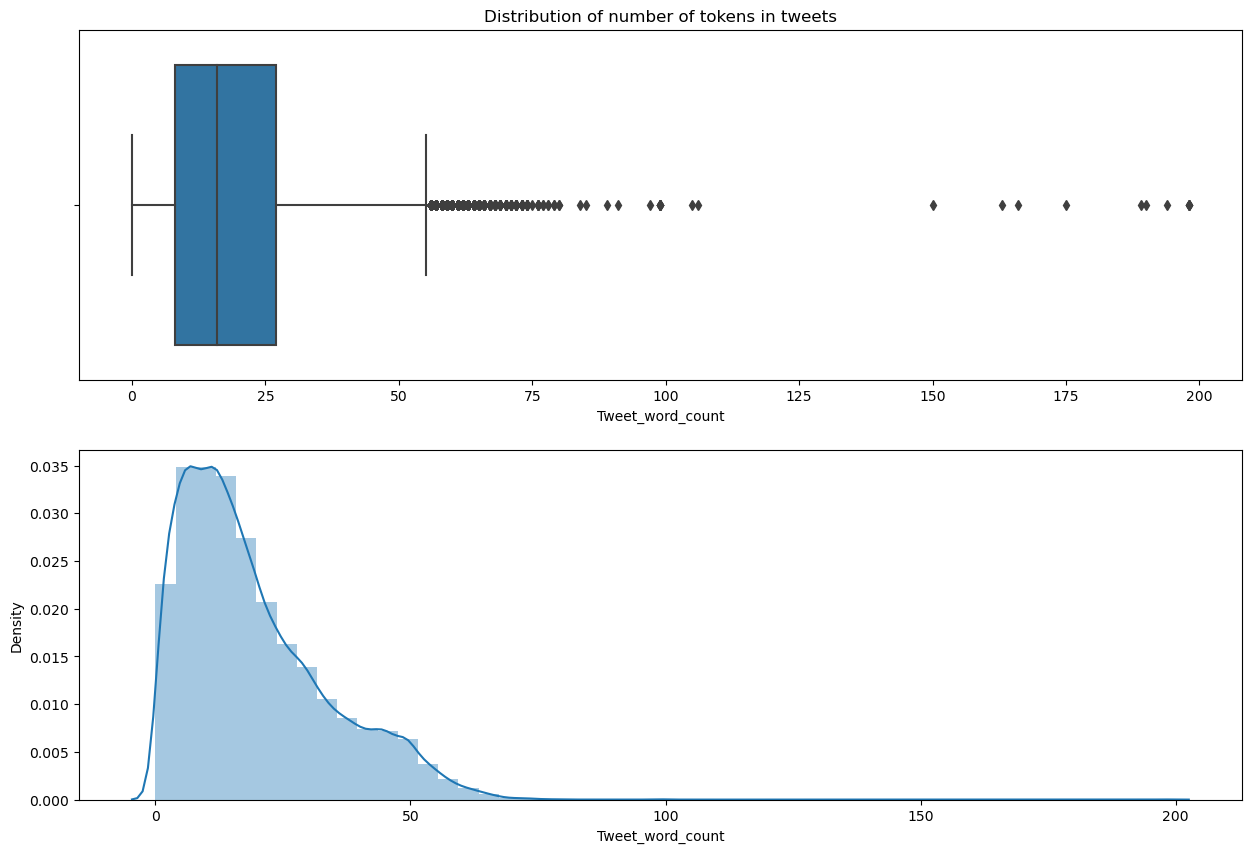

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_word_count'])
plt.title(('Distribution of number of tokens in tweets'))

plt.subplot(2,1,2)
sns.distplot(a=df_data['Tweet_word_count'])

In [16]:
#Extreme outliers
extreme_outliers = df_data['Tweet'][df_data['Tweet_word_count']>125]

for i in extreme_outliers.index:
    print(i,'Tweet Sentiment: ',df_data['Sentiment'][i])
    print(extreme_outliers[i])
    print('\n')

1826 Tweet Sentiment:  Neutral
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


8546 Tweet Sentiment:  Positive
I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E


10454 Tweet Sentiment:  Positive
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [17]:
#Get count of characters in each tweet excluding the whitespaces
df_data['Tweet_char_count']=df_data['Tweet'].apply(lambda x: len(x)-x.count(' '))

C:\Users\CHARISHMA\AppData\Local\Temp\ipykernel_3552\639789031.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_data['Tweet_char_count'])


<Axes: xlabel='Tweet_char_count', ylabel='Density'>

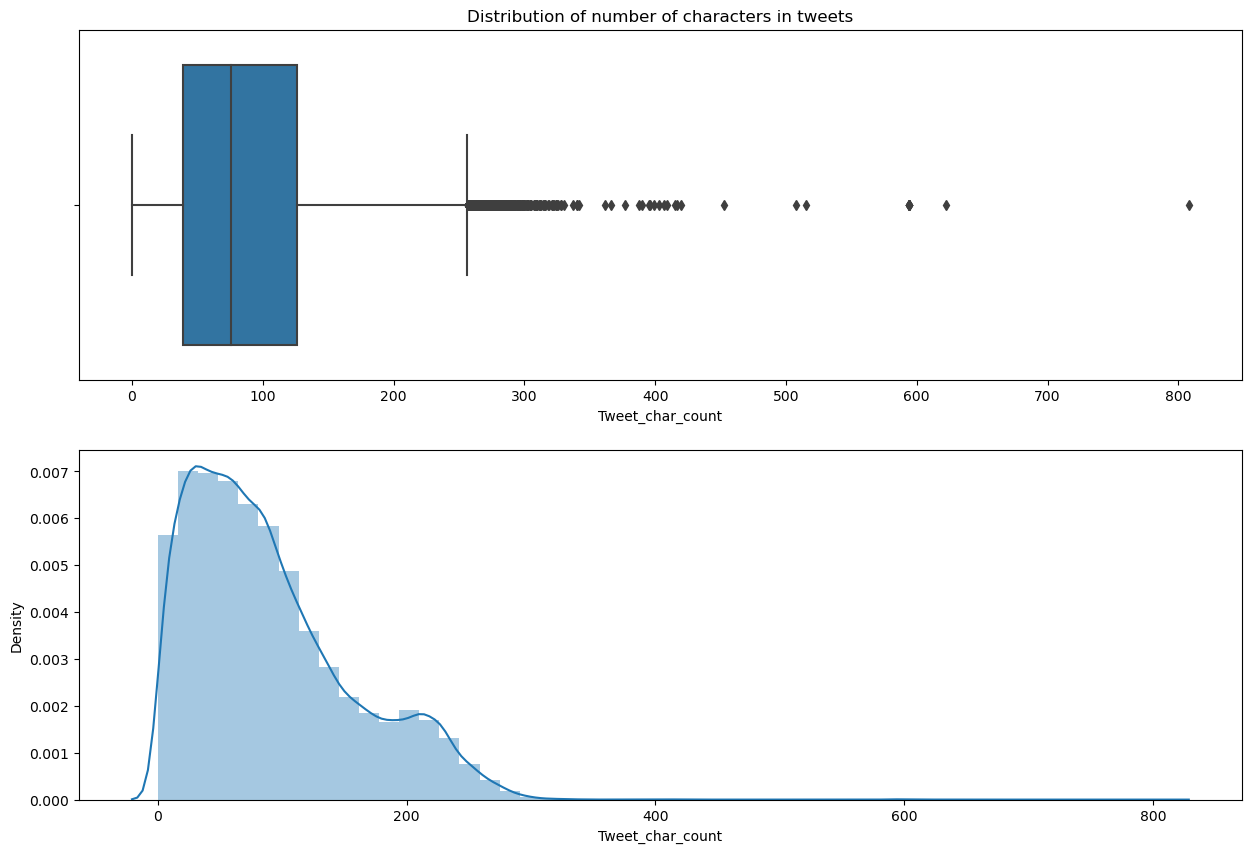

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_char_count'])
plt.title(('Distribution of number of characters in tweets'))

plt.subplot(2,1,2)
sns.distplot(a=df_data['Tweet_char_count'])

In [24]:
# Assuming df is your DataFrame
missing_percentage = (df_data.isnull().sum() / len(df_data)) * 100
print(missing_percentage)

Tweet_ID            0.0
Topic               0.0
Sentiment           0.0
Tweet               0.0
Tweet_word_count    0.0
Tweet_char_count    0.0
dtype: float64


In [25]:
df_data.dropna(axis=0,how='any',inplace=True)

In [26]:
df_data.isnull().sum()

Tweet_ID            0
Topic               0
Sentiment           0
Tweet               0
Tweet_word_count    0
Tweet_char_count    0
dtype: int64

In [29]:
#Seperate dependent and independent features
X=df_data.loc[:,df_data.columns!='Sentiment']
y=df_data['Sentiment']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (51797, 5) (51797,)
Test (22199, 5) (22199,)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
print(X_train.columns)

Index(['Tweet_ID', 'Topic', 'Tweet', 'Tweet_word_count', 'Tweet_char_count'], dtype='object')


In [37]:
vectorizer = TfidfVectorizer(stop_words='english') 
features_train= vectorizer.fit_transform(X_train['Tweet'])
features_valid= vectorizer.transform(X_valid['Tweet'])
features_train.shape, features_valid.shape

((51797, 28689), (22199, 28689))

In [38]:
#Function to fit and apply a model
def model_apply(model):
    #train the model
    model.fit(features_train,y_train)
    #make predictions
    pred=model.predict(features_valid)
    #model evaluation
    print(model)
    print('Accuracy score: ',accuracy_score(pred,y_valid))
    print('Weighted F1 score: ',f1_score(y_pred=pred,y_true=y_valid,average='weighted'))
    print('Confusion Matrix: \n',confusion_matrix(pred,y_valid))

In [42]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def model_apply(model):
    # Fit the model
    model.fit(features_train, y_train)
    
    # Predict on the validation set
    pred = model.predict(features_valid)
    
    # Model evaluation
    print(model)
    print('Accuracy score:', accuracy_score(pred, y_valid))
    print('Weighted F1 score:', f1_score(y_pred=pred, y_true=y_valid, average='weighted'))
    print('Confusion Matrix:\n', confusion_matrix(pred, y_valid))

# Assuming you have already defined features_train, features_valid, y_train, and y_valid
# Multinomial Naive Bayes
nb = MultinomialNB()
model_apply(nb)


MultinomialNB()
Accuracy score: 0.7322401909995946
Weighted F1 score: 0.7239124021968654
Confusion Matrix:
 [[1740   22   34   22]
 [1014 5979 1120  914]
 [ 269  230 3469  224]
 [ 886  413  796 5067]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def model_apply(model):
    # Fit the model
    model.fit(features_train, y_train)
    pred = model.predict(features_valid)
    print(model)
    print('Accuracy score:', accuracy_score(pred, y_valid))
    print('Weighted F1 score:', f1_score(y_pred=pred, y_true=y_valid, average='weighted'))
    print('Confusion Matrix:\n', confusion_matrix(pred, y_valid))
lr = LogisticRegression(random_state=10, max_iter=500)
model_apply(lr)

LogisticRegression(max_iter=500, random_state=10)
Accuracy score: 0.790621199153115
Weighted F1 score: 0.7892654227158216
Confusion Matrix:
 [[2662  116  158  179]
 [ 481 5836  700  659]
 [ 272  325 4012  348]
 [ 494  367  549 5041]]
